In [1]:
import numpy as np
import pandas as pd
import sys
import os
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append('..')
from helper import *

setwd()
Objects = Objects()

In [3]:
id="housing"
con = duckdb.connect(database="data/explotation/db_{}.db".format(id), read_only=True)
df = con.execute("SELECT * FROM {}".format(id)).fetchdf()
con.close

CatalogException: Catalog Error: Cannot open database "data/explotation/db_housing.db" in read-only mode: database does not exist

In [ ]:
df.head()

X          Y  OBJECTID        NCESID  \
0  -89.542799  32.728496      2005  280252001118   
1  -96.657221  40.764352      2007  317284001170   
2 -115.212889  36.007521      2009  320006000700   
3  -74.448768  39.375791      2010  340096000030   
4 -106.614674  31.835316      2012  350108000660   

                                   NAME                ADDRESS           CITY  \
0       LEAKE CENTRAL ELEMENTARY SCHOOL       603 HWY. 16 WEST       CARTHAGE   
1                   POUND MIDDLE SCHOOL         4740 S 45TH ST        LINCOLN   
2  LOIS & JERRY TARKANIAN MIDDLE SCHOOL      5800 W. PYLE AVE.      LAS VEGAS   
3                    VENICE PARK SCHOOL  1601 N PENROSE AVENUE  ATLANTIC CITY   
4                   SANTA TERESA MIDDLE         4800 MCNUTT RD   SANTA TERESA   

  STATE    ZIP    ZIP4  ...     VAL_METHOD   VAL_DATE  \
0    MS  39051  unknow  ...  IMAGERY/OTHER 2010-07-06   
1    NE  68516    1799  ...  IMAGERY/OTHER 2010-08-23   
2    NV  89141  unknow  ...        IMAGERY 2010-05-21   
3    NJ   8401    1710  ...  IMAGERY/OTHER 2010-06-28   
4    NM  88008  unknow  ...        IMAGERY 2010-05-25   

                                             WEBSITE  LEVEL_ ENROLLMENT  \
0  http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...       1       1159   
1  http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...       2        827   
2  http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...       2       1739   
3  http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...       1         90   
4  http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...       2        605   

   ST_GRADE END_GRADE  DISTRICTID  FT_TEACHER  SHELTER_ID  
0        PK        05     2802520          63      unknow  
1        06        08     3172840          53    10786596  
2        06        08     3200060          71      unknow  
3        PK        PK     3400960          10      unknow  
4        07        08     3501080          43      unknow  

[5 rows x 33 columns]

In [ ]:
numeric_description(df)

mean           std           min           25%  \
X          -9.277527e+01  1.623434e+01 -1.766399e+02 -1.004928e+02   
Y           3.773894e+01  5.822083e+00  1.769358e+01  3.391991e+01   
OBJECTID    5.130494e+04  2.961960e+04  1.000000e+00  2.565325e+04   
NCESID      2.904634e+11  1.684823e+11  1.000020e+10  1.302280e+11   
ZIP         5.322374e+04  2.926039e+04  6.010000e+02  2.972900e+04   
TYPE        1.229120e+00  7.522527e-01  1.000000e+00  1.000000e+00   
STATUS      1.092078e+00  5.591722e-01  1.000000e+00  1.000000e+00   
POPULATION  5.409097e+02  4.675239e+02  0.000000e+00  2.560000e+02   
COUNTYFIPS  2.894782e+04  1.682940e+04  1.001000e+03  1.312100e+04   
LATITUDE    3.773894e+01  5.822083e+00  1.769358e+01  3.391991e+01   
LONGITUDE  -9.277527e+01  1.623434e+01 -1.766399e+02 -1.004928e+02   
NAICS_CODE  6.111100e+05  0.000000e+00  6.111100e+05  6.111100e+05   
ENROLLMENT  4.926429e+02  4.478009e+02 -2.000000e+00  2.120000e+02   
DISTRICTID  2.904634e+06  1.684823e+06  1.000020e+05  1.302280e+06   
FT_TEACHER  2.827308e+01  2.615993e+01 -1.000000e+00  1.100000e+01   

                     50%           75%           max  missings  \
X          -8.903810e+01 -8.087158e+01 -6.468648e+01       2.0   
Y           3.872773e+01  4.164457e+01  7.130034e+01       2.0   
OBJECTID    5.131350e+04  7.695275e+04  1.025900e+05       0.0   
NCESID      2.905940e+11  4.218990e+11  7.800030e+11       0.0   
ZIP         5.448250e+04  7.833200e+04  9.995000e+04       0.0   
TYPE        1.000000e+00  1.000000e+00  4.000000e+00       0.0   
STATUS      1.000000e+00  1.000000e+00  8.000000e+00       0.0   
POPULATION  4.600000e+02  6.910000e+02  1.398800e+04    3750.0   
COUNTYFIPS  2.903100e+04  4.207900e+04  7.803000e+04       0.0   
LATITUDE    3.872773e+01  4.164457e+01  7.130034e+01       2.0   
LONGITUDE  -8.903810e+01 -8.087158e+01 -6.468648e+01       2.0   
NAICS_CODE  6.111100e+05  6.111100e+05  6.111100e+05       0.0   
ENROLLMENT  4.210000e+02  6.420000e+02  1.387200e+04       0.0   
DISTRICTID  2.905940e+06  4.218990e+06  7.800030e+06       0.0   
FT_TEACHER  2.500000e+01  3.800000e+01  1.245000e+03       0.0   

            missing ratio (%)  
X                        0.00  
Y                        0.00  
OBJECTID                 0.00  
NCESID                   0.00  
ZIP                      0.00  
TYPE                     0.00  
STATUS                   0.00  
POPULATION               3.66  
COUNTYFIPS               0.00  
LATITUDE                 0.00  
LONGITUDE                0.00  
NAICS_CODE               0.00  
ENROLLMENT               0.00  
DISTRICTID               0.00  
FT_TEACHER               0.00

In [ ]:
description_categorical(df)

#Levels                                   Max Freq (Abs,%)  \
0         NAME    87449               LINCOLN ELEMENTARY SCHOOL (88, 0.09)   
1      ADDRESS    93077          6420 E. BROADWAY BLVD. SUITE A (33, 0.03)   
2         CITY    12805                                HOUSTON (800, 0.78)   
3        STATE       53                                  CA (10414, 10.17)   
4         ZIP4     8560                              unknow (43766, 42.75)   
5    TELEPHONE    75591                              unknow (19311, 18.86)   
6       COUNTY     1908                           LOS ANGELES (2277, 2.22)   
7      COUNTRY        2                                USA (100881, 98.55)   
8   NAICS_DESC        1   ELEMENTARY AND SECONDARY SCHOOLS (102370, 100.0)   
9       SOURCE   102370  http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...   
10  VAL_METHOD        4                       IMAGERY/OTHER (56648, 55.34)   
11     WEBSITE   102370  http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...   
12      LEVEL_        5                                   1 (54269, 53.01)   
13    ST_GRADE       18                                  PK (30270, 29.57)   
14   END_GRADE       18                                  05 (27164, 26.54)   
15  SHELTER_ID    22927                              unknow (77549, 75.75)   

                                     Min Freq (Abs,%)  #Unknows  Unknows (%)  
0            1 LT CHARLES W. WHITCOMB SCHOOL (1, 0.0)         0         0.00  
1                            #1 ACADEMIC CIR (1, 0.0)         0         0.00  
2                                     ABBOTT (1, 0.0)         0         0.00  
3                                       VI (31, 0.03)         0         0.00  
4                                       0003 (1, 0.0)     43766        42.75  
5                             (201) 166-0100 (1, 0.0)     19311        18.86  
6                                     BORDEN (1, 0.0)         0         0.00  
7                                    PRI (1489, 1.45)         0         0.00  
8    ELEMENTARY AND SECONDARY SCHOOLS (102370, 100.0)         0         0.00  
9   http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...         0         0.00  
10                             UNVERIFIED (1124, 1.1)         0         0.00  
11  http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...         0         0.00  
12                                     N (3248, 3.17)         0         0.00  
13                                        13 (1, 0.0)         0         0.00  
14                                      UG (85, 0.08)         0         0.00  
15                                  10773993 (1, 0.0)     77549        75.75

In [4]:
correlation(df)

NameError: name 'df' is not defined

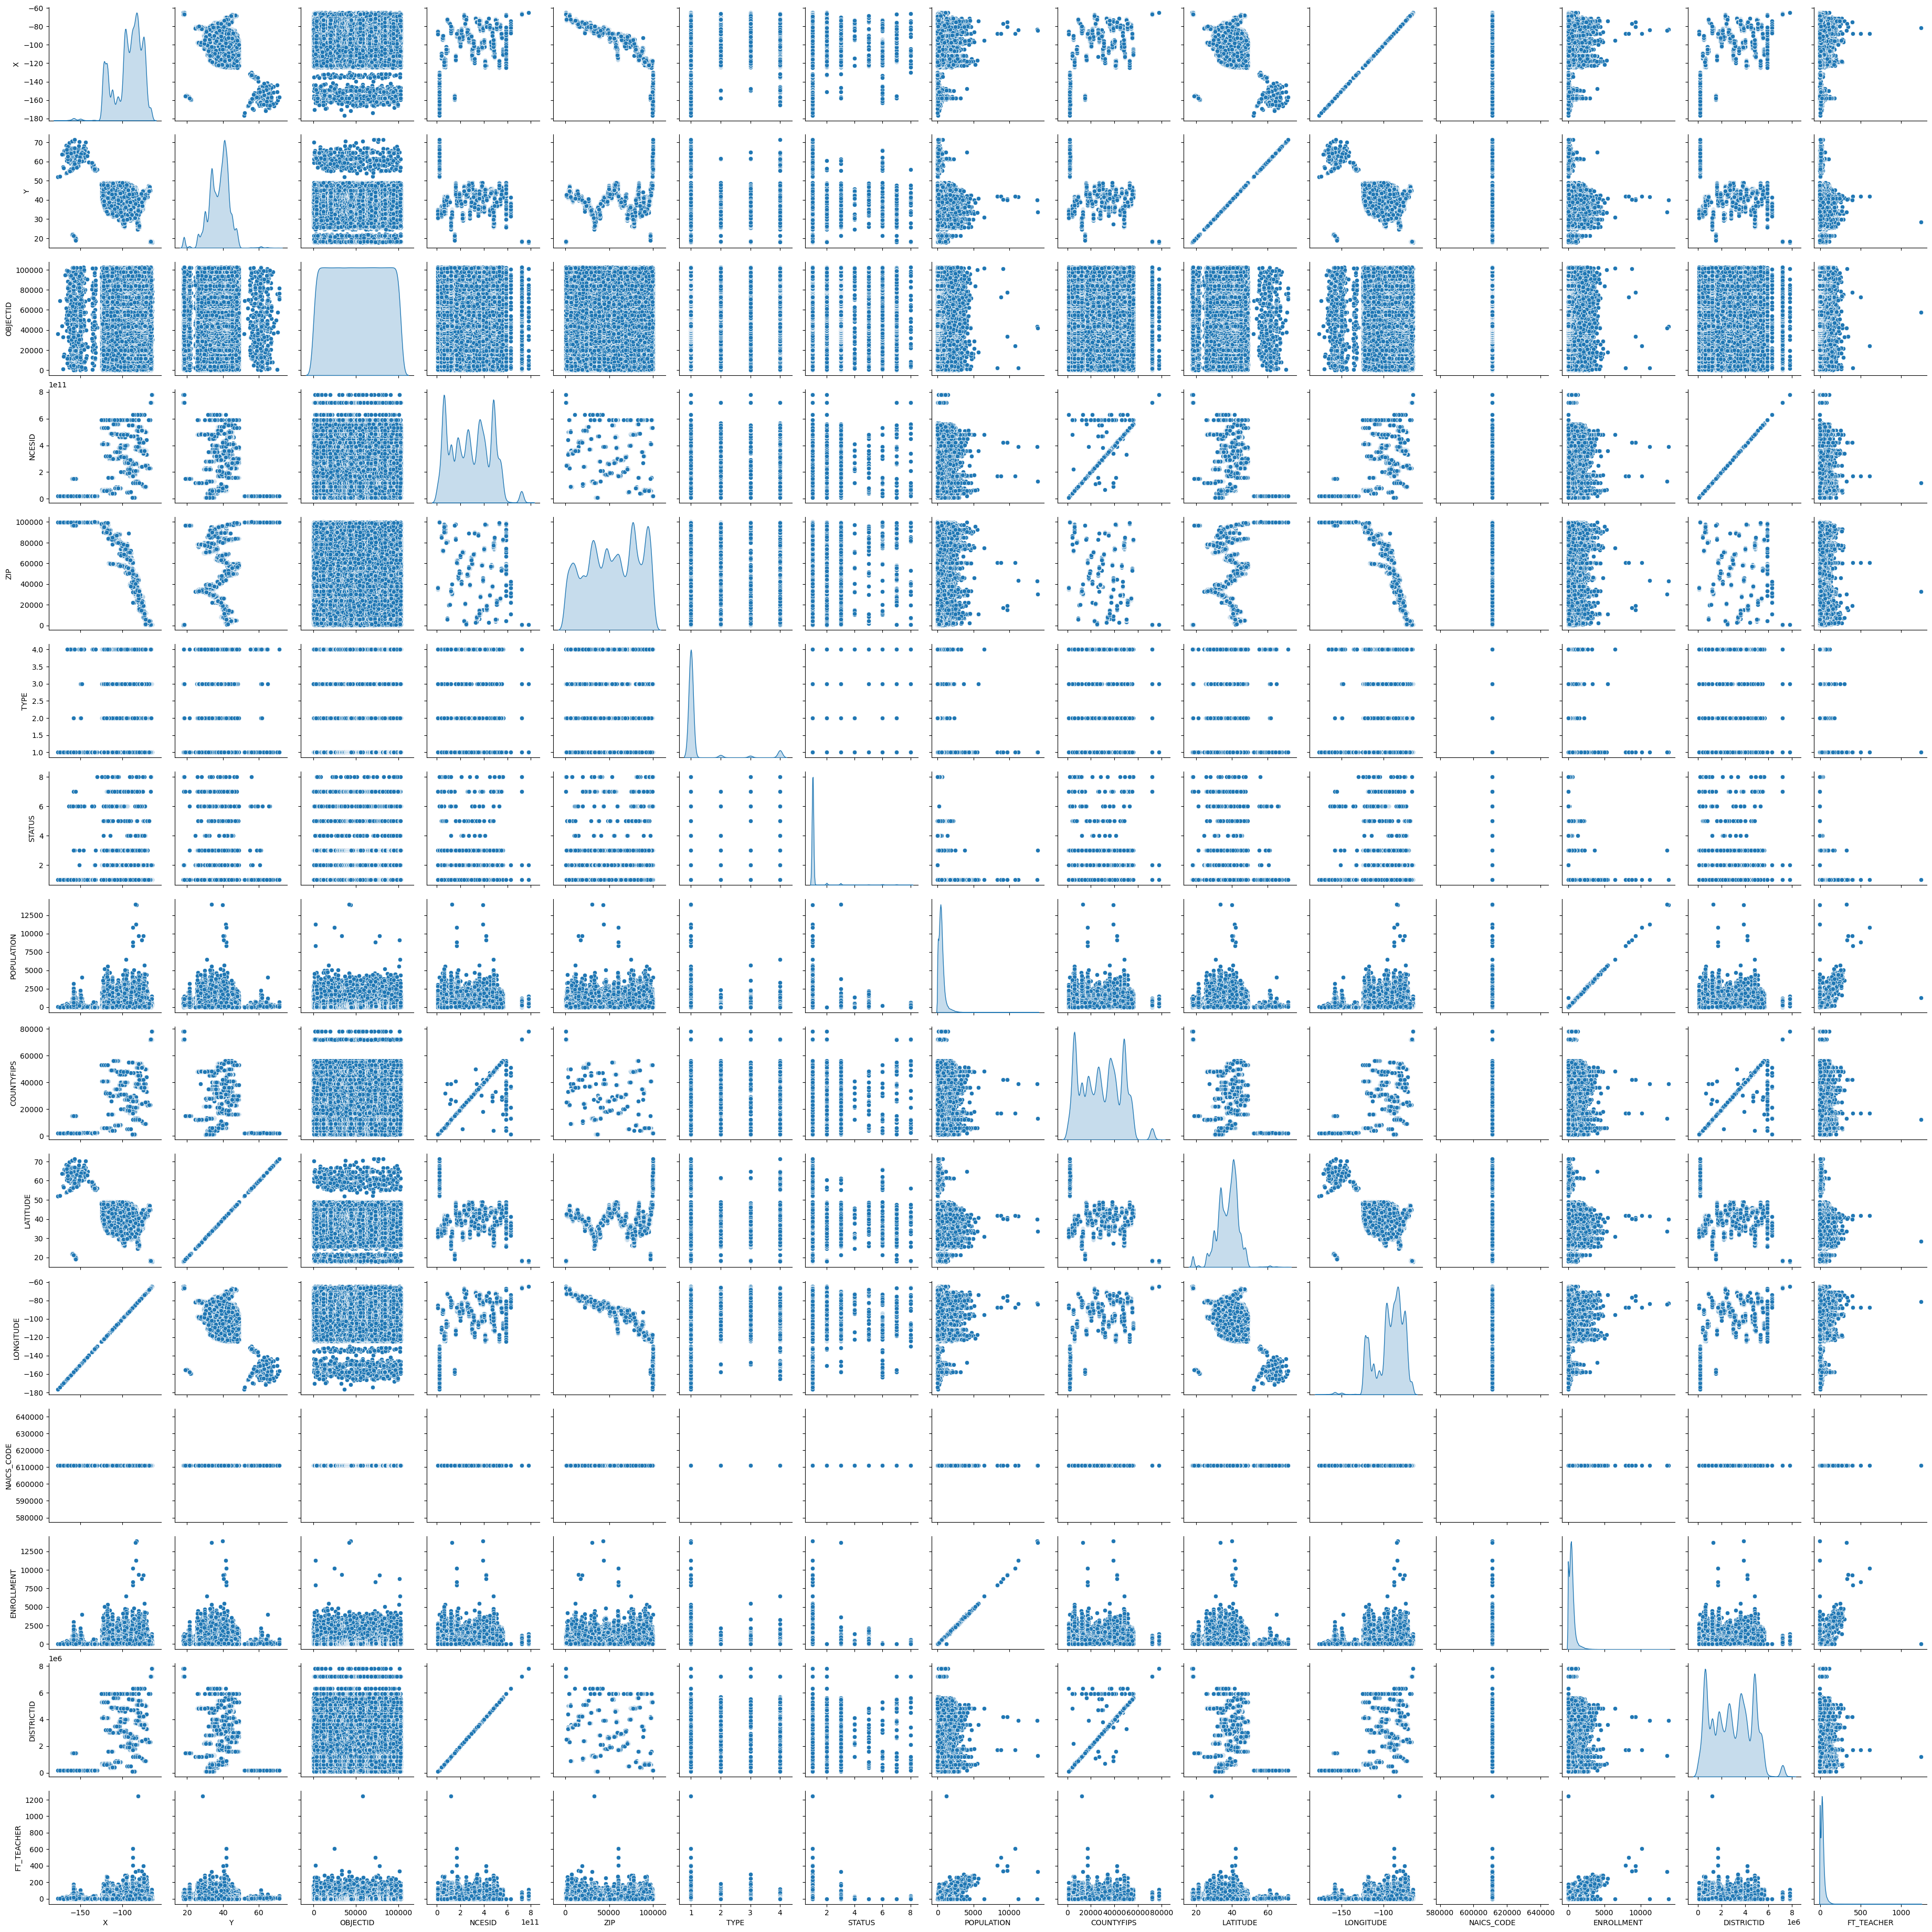

In [9]:
scatter(df)

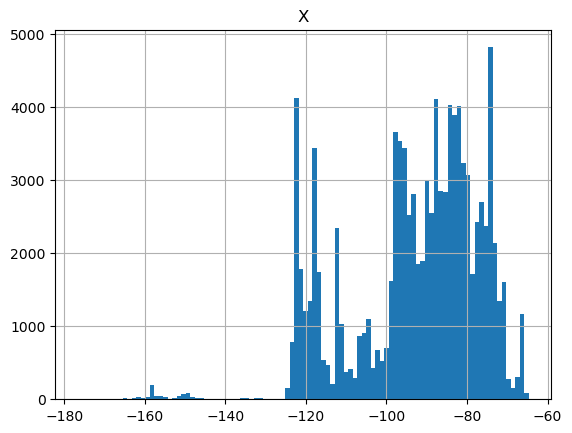

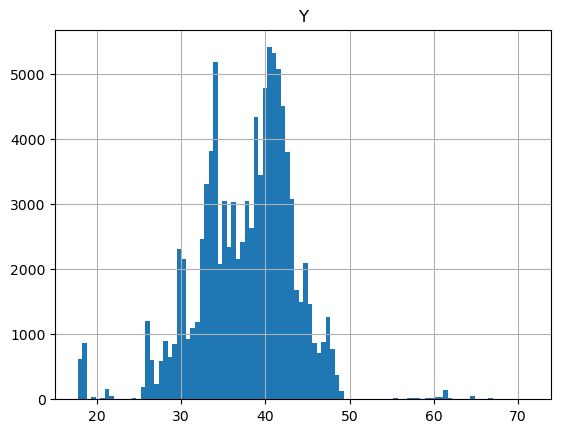

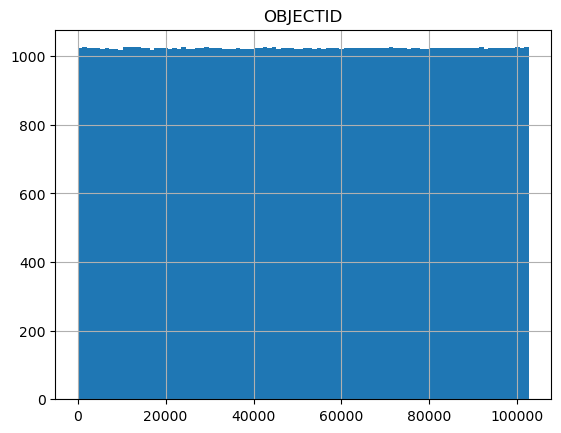

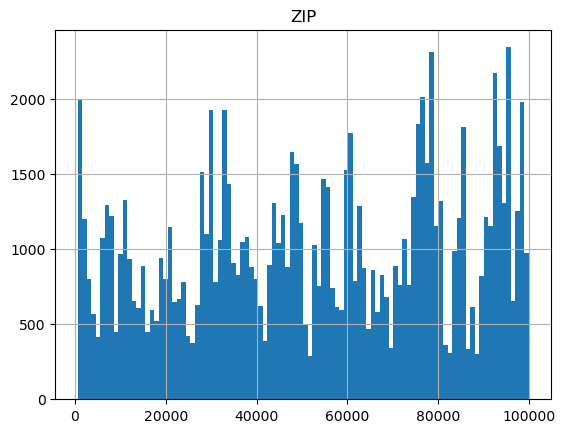

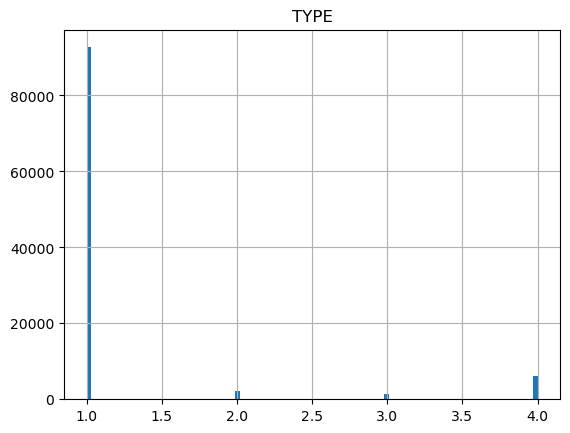

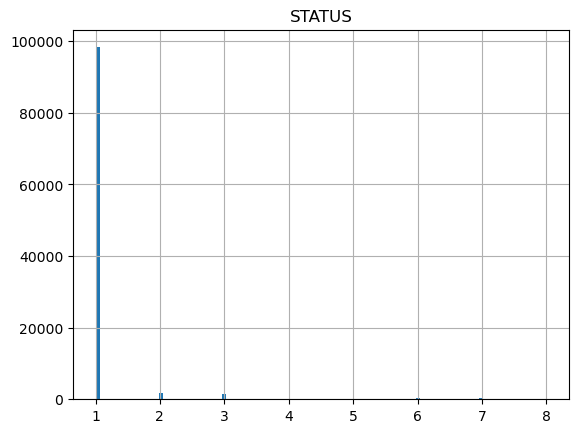

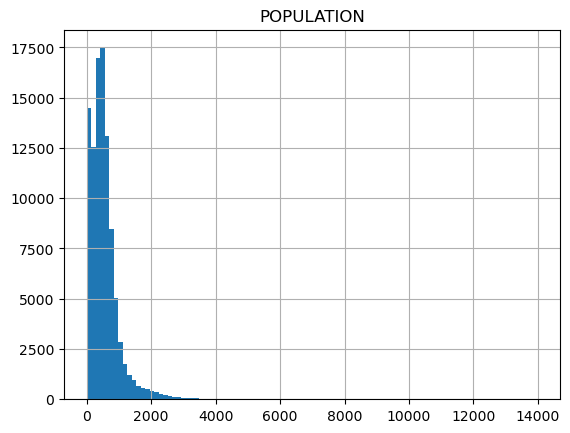

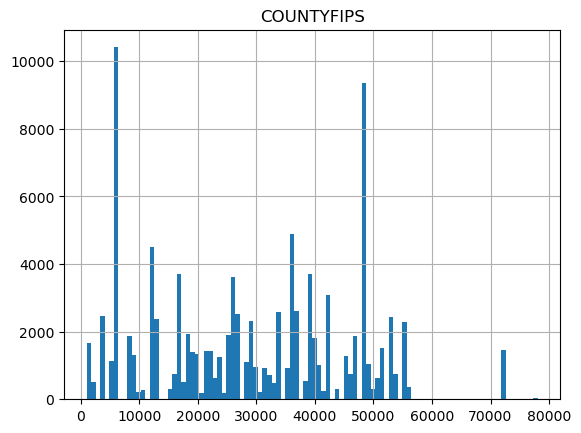

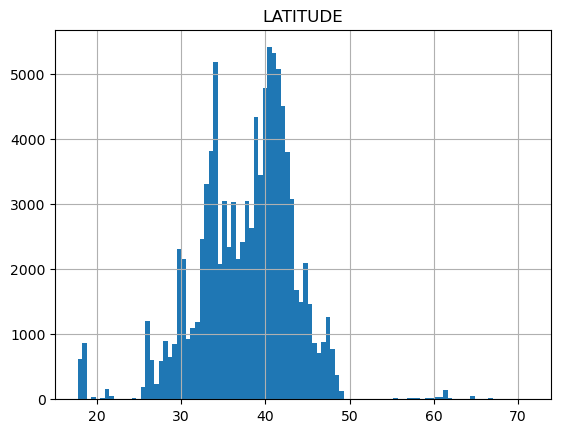

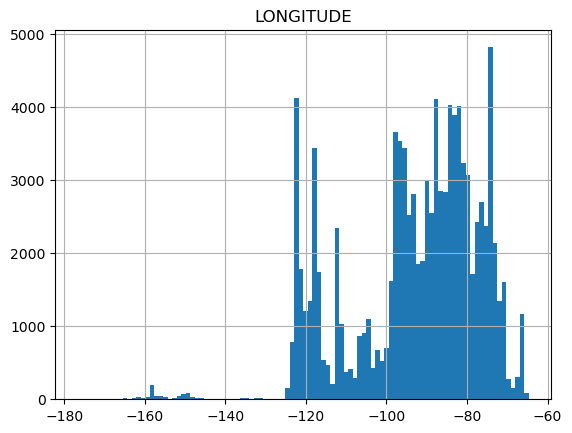

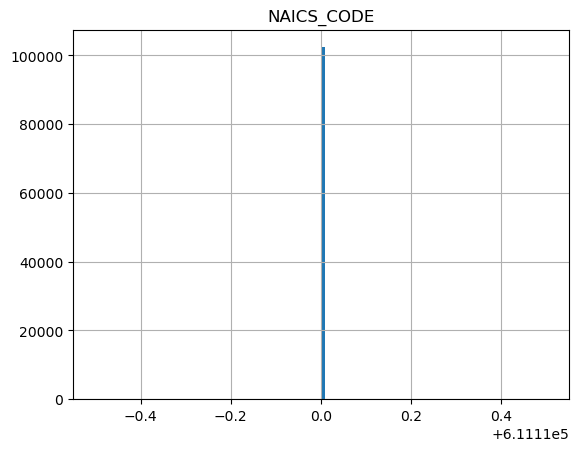

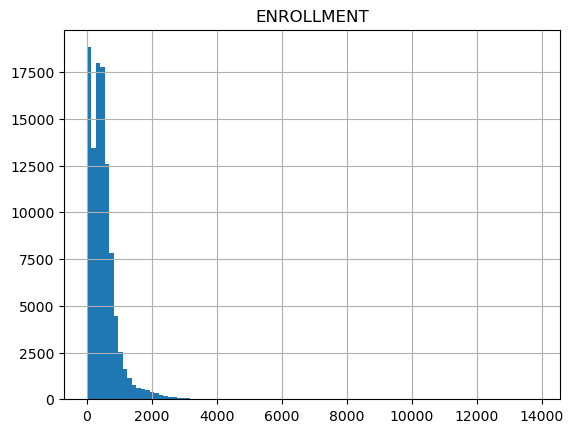

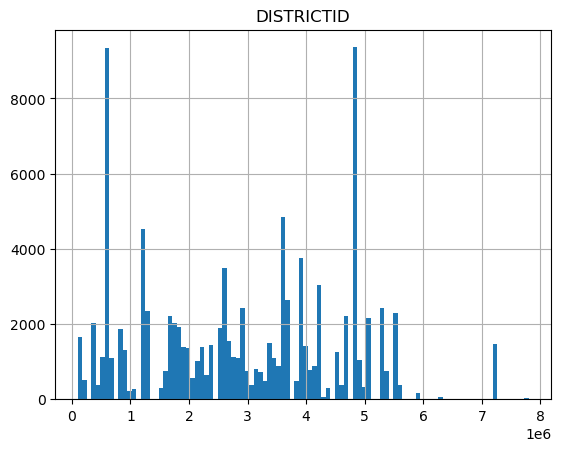

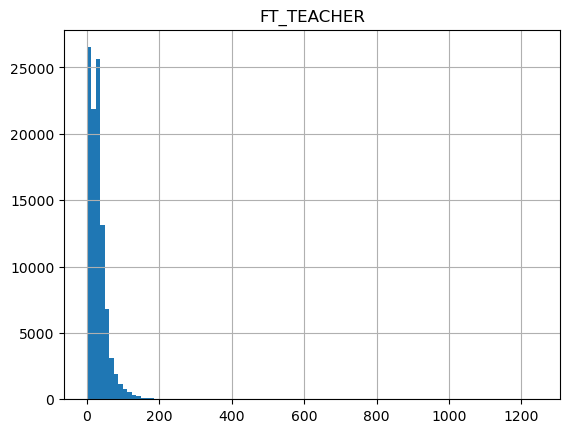

In [10]:
hist(df, bins=100)

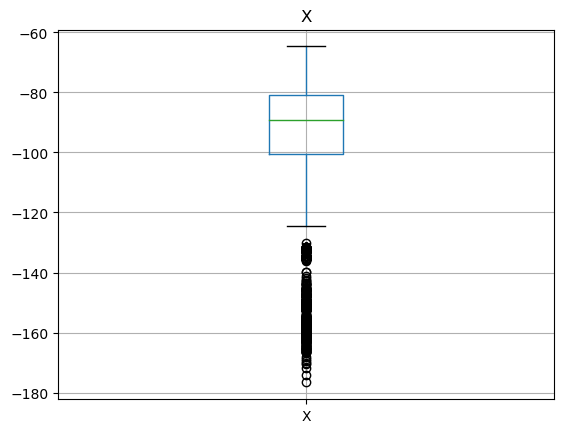

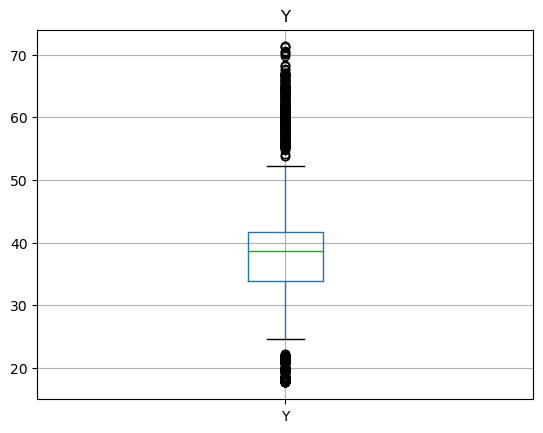

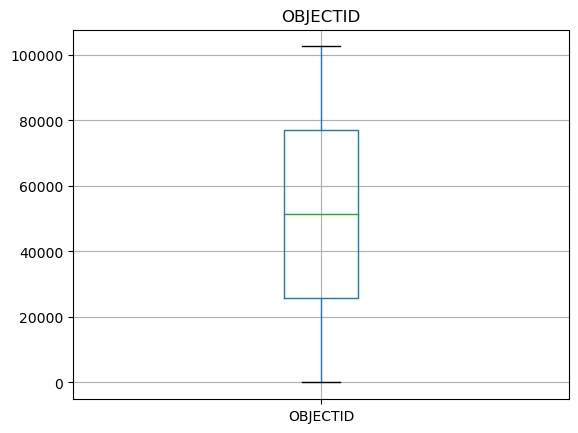

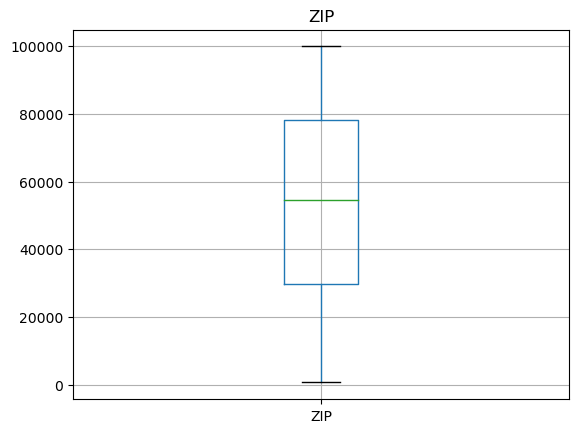

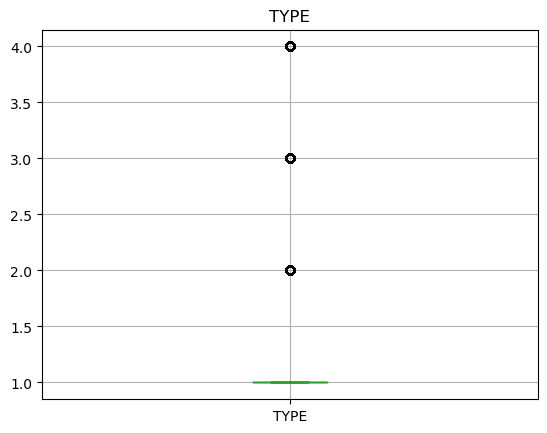

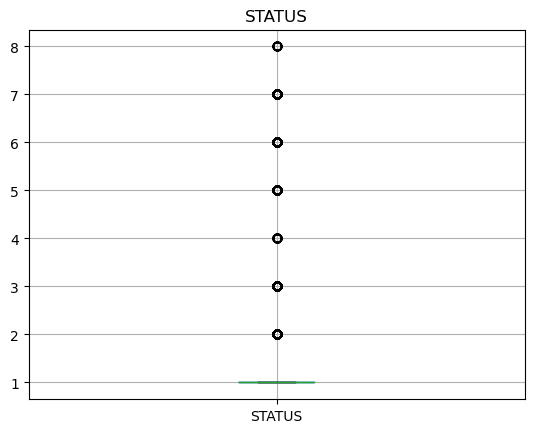

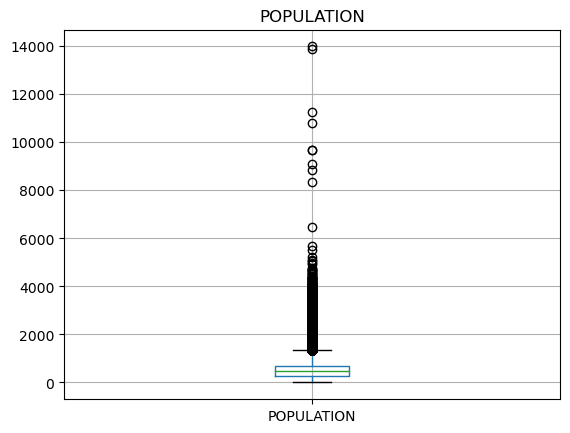

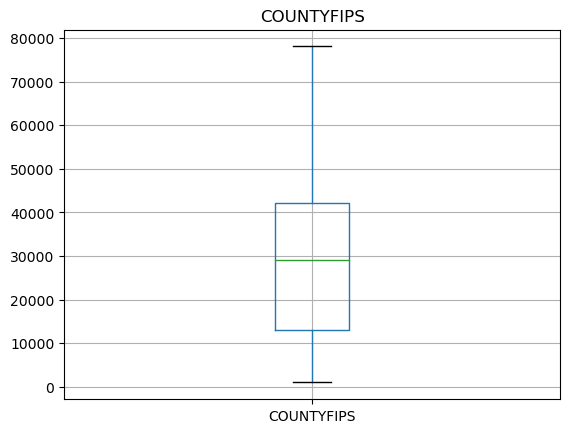

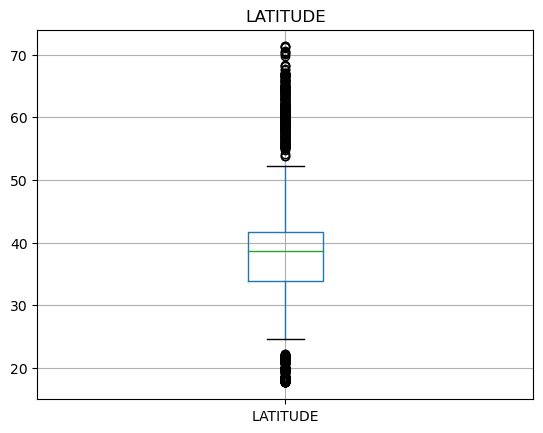

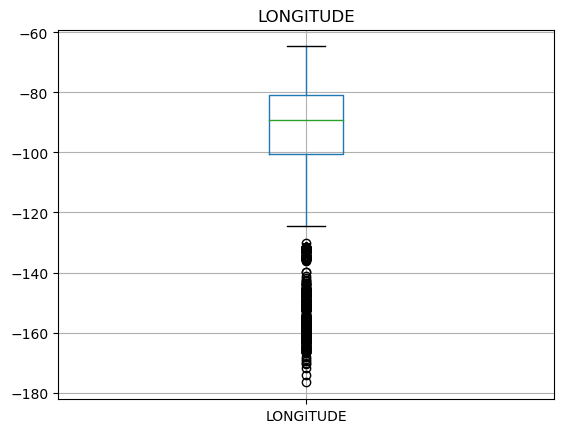

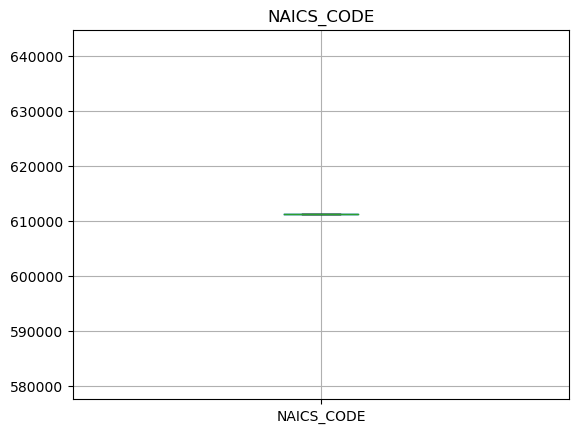

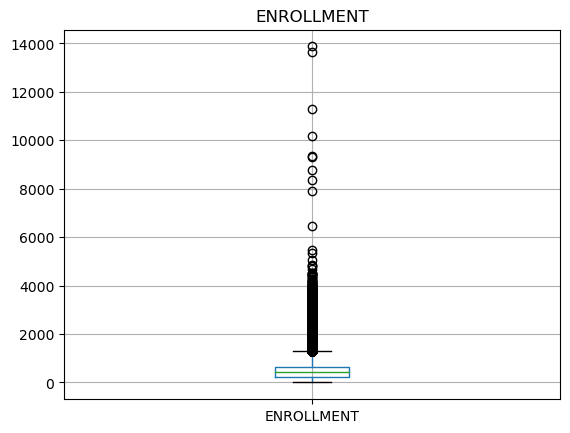

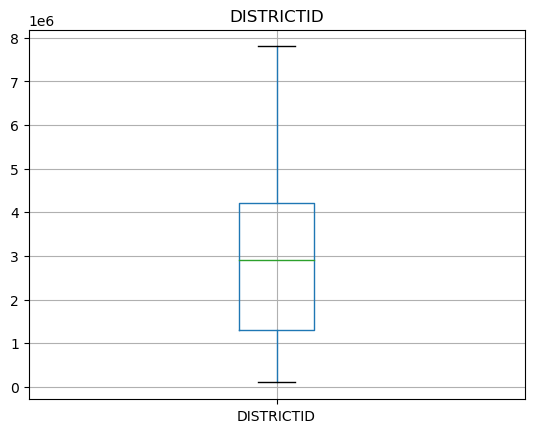

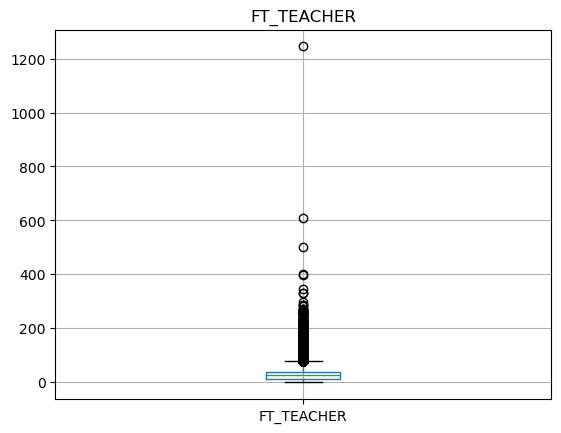

In [11]:
boxplot(df)

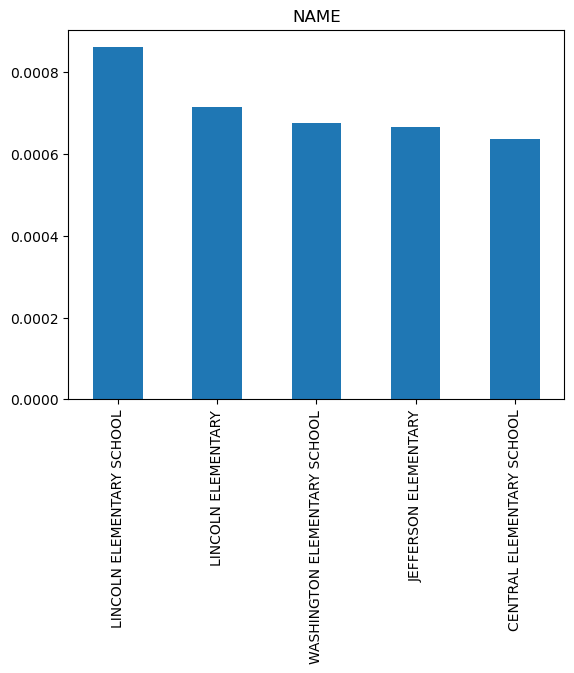

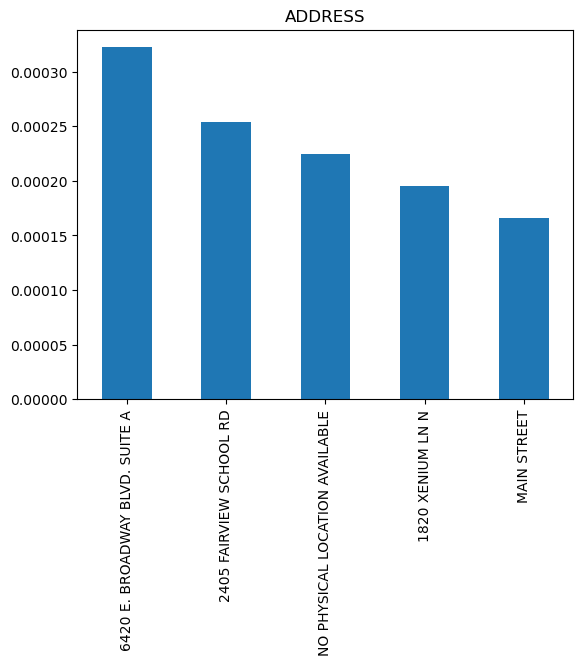

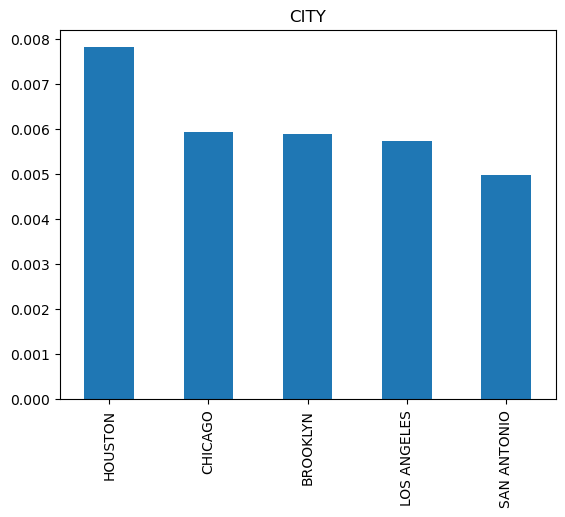

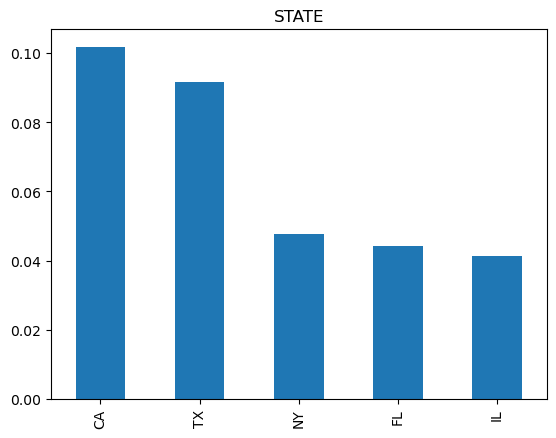

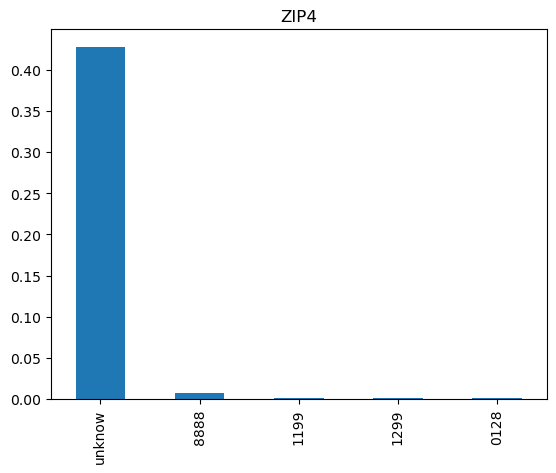

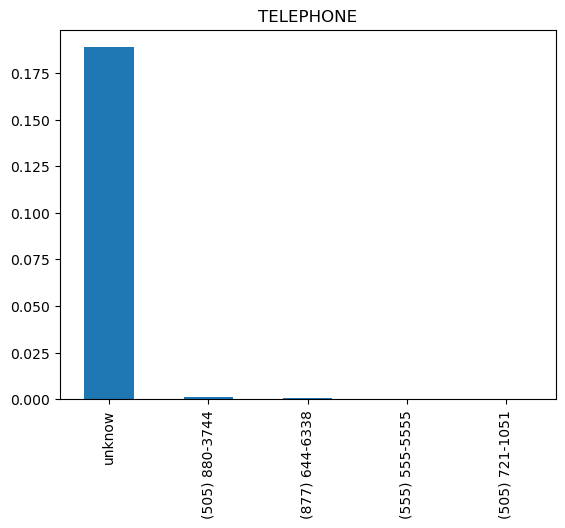

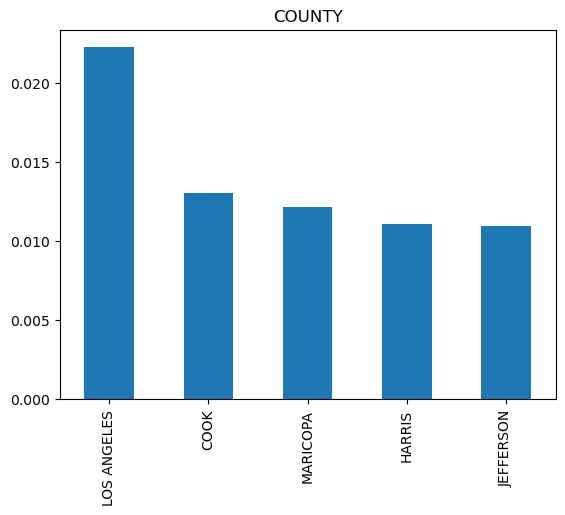

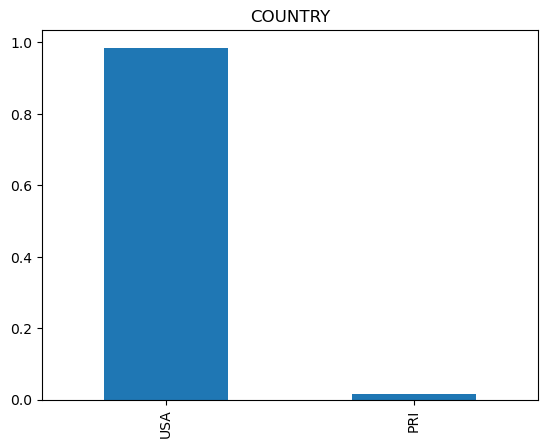

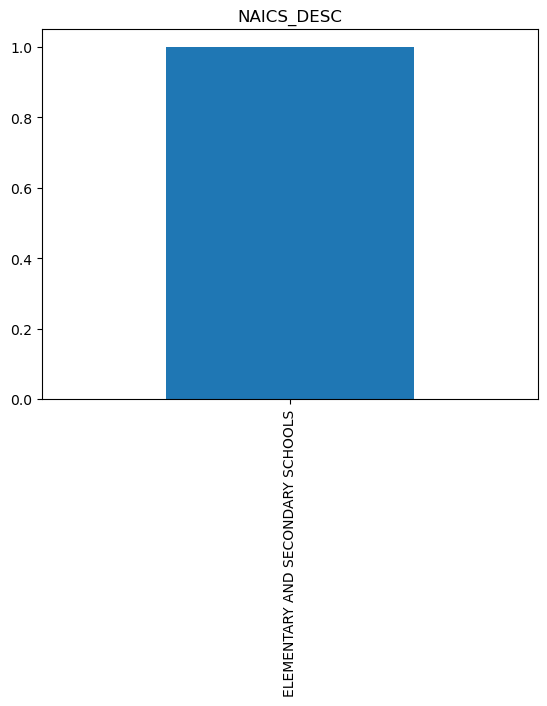

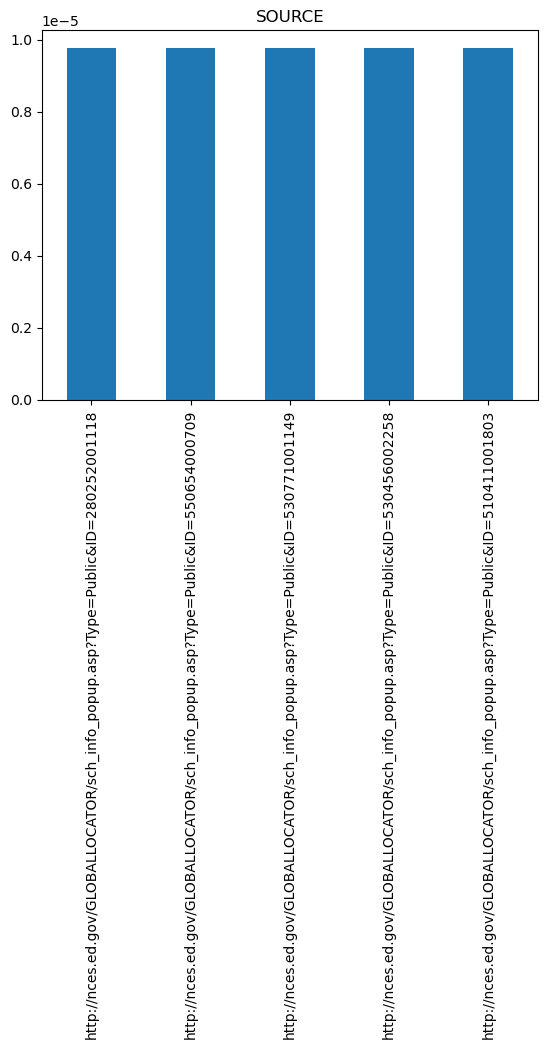

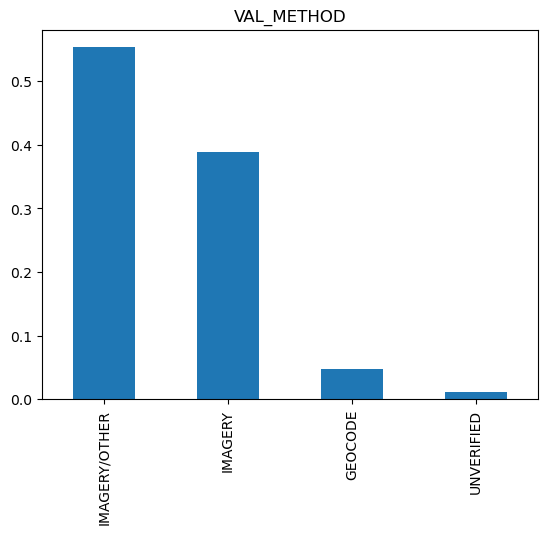

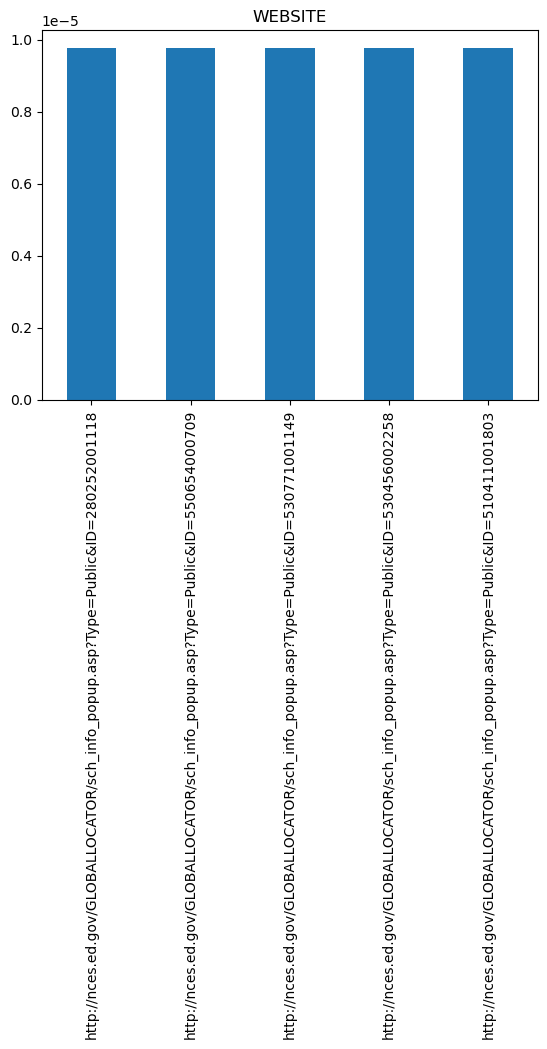

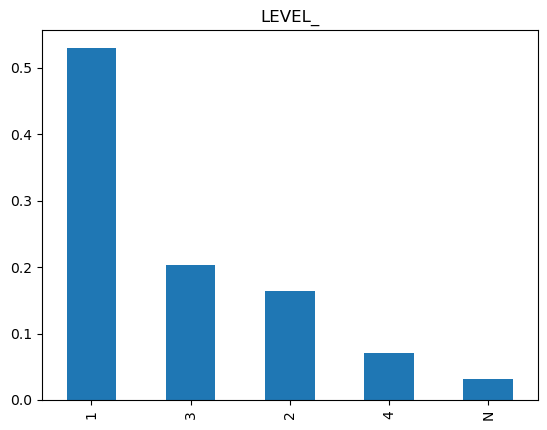

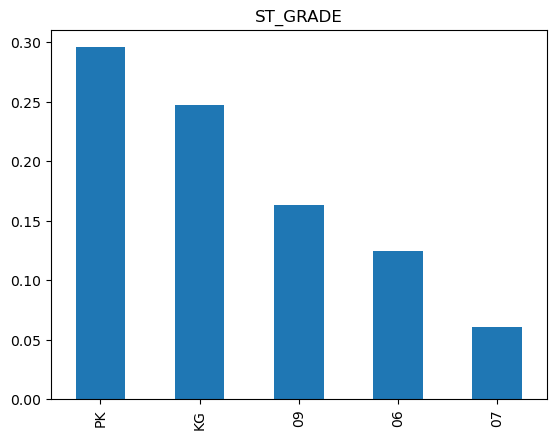

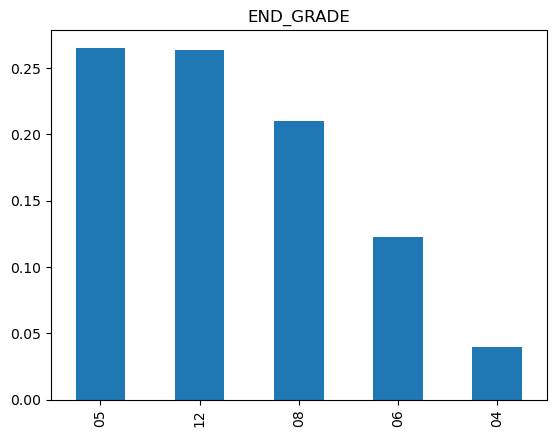

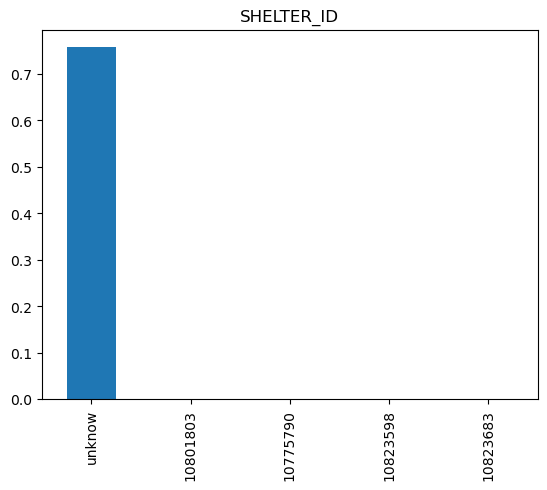

In [12]:
barplot(df,top=5,freq=True)